# **1 - Introdução e Descrição do Dataset**

O projeto visa aplicar técnicas de Big Data e Data Science para analisar o cadastro de pretendentes de moradias populares em Curitiba. O objetivo é compreender melhor o perfil dos solicitantes e identificar padrões e insights que possam auxiliar na tomada de decisões para políticas habitacionais mais eficazes.

Link do Data Set: [Fila de Pretendentes](https://www.google.com/url?q=https%3A%2F%2Fwww.curitiba.pr.gov.br%2Fdadosabertos%2Fbusca%2F%3Fpagina%3D5)

**Tipo do Dataset:**

O dataset é semi-estruturado. Embora esteja organizado em tabelas, algumas colunas contêm dados textuais que podem precisar de interpretação ou limpeza.

**Variáveis:**

**id**: Identificador único (numérico)

**data_inscricao**: Data de inscrição (data)

**data_validade**: Data de validade (mês/ano, necessita de conversão)

**condicao_especial**: Condição especial (texto)

**faixa_renda**: Faixa de renda (texto)

**bairro**: Bairro (texto)

**cidade**: Cidade (texto)

**data_lote**: Data do lote (data e hora)



**Descrição das Atividades Realizadas no Dataset:**

- Carregamento do arquivo Excel.
- Conversão em CSV
- Visualização inicial dos dados.
- Identificação das variáveis e tipos de dados.
- Coleta de dados e importação.
- Revisão inicial da estrutura e conteúdo do dataset.
- Planejamento para manipulação e limpeza dos dados.

**Seleção das Ferramentas/Técnicas de Big Data:**

- Pandas (para manipulação e análise de dados)
- Matplotlib/Seaborn (para visualização)
- PySpark (para processamento de grandes volumes de dados)

# **2 - Importação, Conversão e Leitura**

In [114]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, year, month, when, count
import matplotlib.pyplot as plt

# Carregar o arquivo Excel e salvar como CSV
file_path = 'fila.xlsx'
df = pd.read_excel(file_path, sheet_name='Planilha1')
csv_file_path = 'fila.csv'
df.to_csv(csv_file_path, index=False)

# Iniciar uma sessão do Spark
spark = SparkSession.builder.appName("DataAnalysis").getOrCreate()

# Carregar o arquivo CSV no Spark
spark_df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Exibir as primeiras linhas do DataFrame no Spark
spark_df.show()

+---+--------------+-------------+--------------------+--------------------+--------------------+--------------------+-------------------+
| id|data_inscricao|data_validade|   condicao_especial|         faixa_renda|              bairro|              cidade|          data_lote|
+---+--------------+-------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|  1|    1986-12-30|      07/2021|              Mulher|FAIXA 3 (mais de ...|NÚCLEO HABITACION...|         Campo Largo|2020-11-03 10:28:10|
|  2|    1988-04-26|      07/2021|              Mulher|FAIXA 1 (menos de...|      Campo Comprido|            Curitiba|2020-11-03 10:28:10|
|  3|    1988-05-17|      04/2021|              Mulher|FAIXA 2 (entre 16...|   Cidade Industrial|            Curitiba|2020-11-03 10:28:10|
|  4|    1990-07-12|      01/2021|Nenhum critério a...|FAIXA 3 (mais de ...|   Cidade Industrial|            Curitiba|2020-11-03 10:28:10|
|  5|    1989-07-03|      0

# **2.1. - Descrição do Dataset**

In [115]:
# Descrição do dataset
dataset_description = {
    "Fonte/Origem": "Arquivo Excel 'fila.xlsx'",
    "Apresentação do Cenário": "O dataset contém informações de inscrições relacionados a fila de moradia na região de Curitiba, com dados como data de inscrição, validade da inscrição, condição especial do inscrito, faixa de renda, bairro, cidade e data do lote.",
    "Tipo do Dataset": "Semi-Estruturado",
    "Descrição do Dataset": {
        "Número de Instâncias": spark_df.count(),
        "Número de Variáveis": len(spark_df.columns),
        "Variáveis": spark_df.columns,
        "Tipos de Dados": {col: dtype for col, dtype in spark_df.dtypes}
    },
    "Manipulação Prévia do Dataset": "Carregamento, conversão para CSV e carga no ambiente Spark.",
    "Atividades Realizadas no Dataset": [
        "Carregamento e conversão do dataset",
        "Seleção de variáveis relevantes",
        "Análise exploratória inicial",
        "Documentação inicial do projeto"
    ]
}
print(dataset_description)

{'Fonte/Origem': "Arquivo Excel 'fila.xlsx'", 'Apresentação do Cenário': 'O dataset contém informações de inscrições relacionados a fila de moradia na região de Curitiba, com dados como data de inscrição, validade da inscrição, condição especial do inscrito, faixa de renda, bairro, cidade e data do lote.', 'Tipo do Dataset': 'Semi-Estruturado', 'Descrição do Dataset': {'Número de Instâncias': 41775, 'Número de Variáveis': 8, 'Variáveis': ['id', 'data_inscricao', 'data_validade', 'condicao_especial', 'faixa_renda', 'bairro', 'cidade', 'data_lote'], 'Tipos de Dados': {'id': 'int', 'data_inscricao': 'date', 'data_validade': 'string', 'condicao_especial': 'string', 'faixa_renda': 'string', 'bairro': 'string', 'cidade': 'string', 'data_lote': 'timestamp'}}, 'Manipulação Prévia do Dataset': 'Carregamento, conversão para CSV e carga no ambiente Spark.', 'Atividades Realizadas no Dataset': ['Carregamento e conversão do dataset', 'Seleção de variáveis relevantes', 'Análise exploratória inicial'

# **2.2. - Seleção de Variáveis Relevantes**

In [116]:
# Selecionar variáveis relevantes para o projeto
selected_columns = ['data_inscricao', 'data_validade', 'condicao_especial', 'faixa_renda', 'bairro', 'cidade', 'data_lote']
spark_df_selected = spark_df.select(selected_columns)
spark_df_selected.show()

# Verificar tipos de dados das colunas selecionadas
spark_df_selected.dtypes

+--------------+-------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|data_inscricao|data_validade|   condicao_especial|         faixa_renda|              bairro|              cidade|          data_lote|
+--------------+-------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|    1986-12-30|      07/2021|              Mulher|FAIXA 3 (mais de ...|NÚCLEO HABITACION...|         Campo Largo|2020-11-03 10:28:10|
|    1988-04-26|      07/2021|              Mulher|FAIXA 1 (menos de...|      Campo Comprido|            Curitiba|2020-11-03 10:28:10|
|    1988-05-17|      04/2021|              Mulher|FAIXA 2 (entre 16...|   Cidade Industrial|            Curitiba|2020-11-03 10:28:10|
|    1990-07-12|      01/2021|Nenhum critério a...|FAIXA 3 (mais de ...|   Cidade Industrial|            Curitiba|2020-11-03 10:28:10|
|    1989-07-03|      04/2020|              Mulher|FAIX

[('data_inscricao', 'date'),
 ('data_validade', 'string'),
 ('condicao_especial', 'string'),
 ('faixa_renda', 'string'),
 ('bairro', 'string'),
 ('cidade', 'string'),
 ('data_lote', 'timestamp')]

# **3 - Estatisticas Descritivas**

In [117]:
# Estatísticas descritivas gerais
desc_stats = data.describe()

# Medidas de posição
mean_faixa_renda = data['faixa_renda'].mean()
median_faixa_renda = data['faixa_renda'].median()
mode_faixa_renda = data['faixa_renda'].mode()[0]
mode_bairro = data['bairro'].mode()[0]

# Medidas de dispersão
std_dev_faixa_renda = data['faixa_renda'].std()
range_data_inscricao = data['data_inscricao'].max() - data['data_inscricao'].min()

desc_stats, mean_faixa_renda, median_faixa_renda, mode_bairro, std_dev_faixa_renda, range_data_inscricao
print("Medidas de Tendência Central e Dispersão da Faixa de Renda:")
print(f"Média: {mean_faixa_renda}")
print(f"Mediana: {median_faixa_renda}")
print(f"Moda: {mode_faixa_renda}")
print(f"Desvio Padrão: {std_dev_faixa_renda}")
print(f"Intervalo (Data de Inscrição): {range_data_inscricao}")

print("\nMedida de Tendência Central para o Bairro:")
print(f"Moda: {mode_bairro}")

Medidas de Tendência Central e Dispersão da Faixa de Renda:
Média: 1.7133453022142429
Mediana: 2.0
Moda: 2
Desvio Padrão: 0.685015810371579
Intervalo (Data de Inscrição): 12362 days 00:00:00

Medida de Tendência Central para o Bairro:
Moda: Cidade Industrial


# **3.1. - Análise de Distribuição**

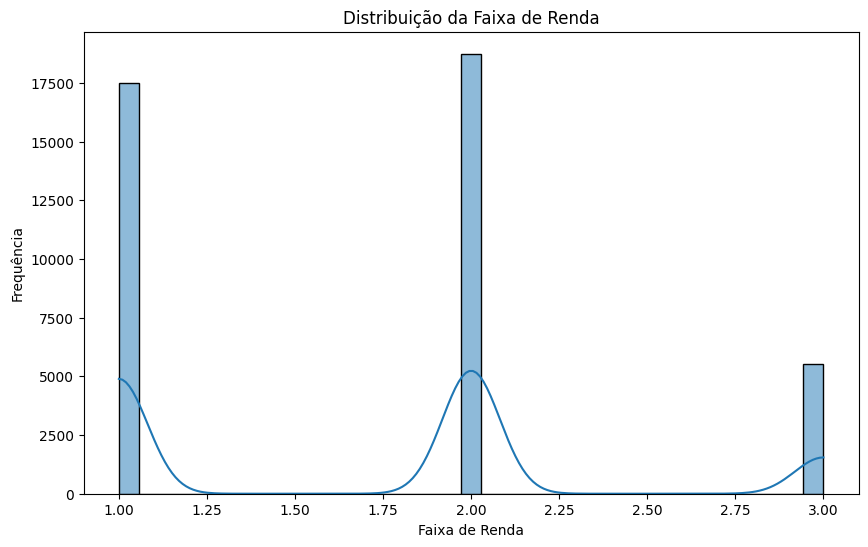

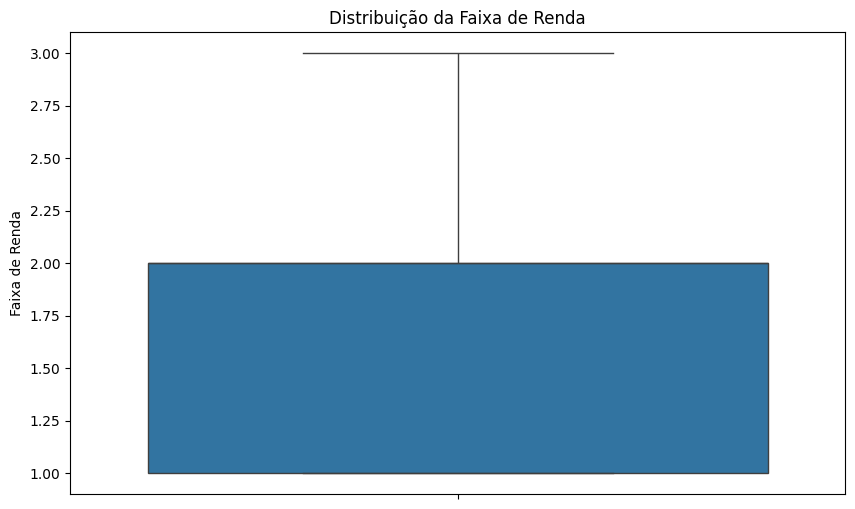

In [118]:
import matplotlib.pyplot as plt
import seaborn as sns

# Histograma da Faixa de Renda
plt.figure(figsize=(10, 6))
sns.histplot(data['faixa_renda'], kde=True)
plt.title('Distribuição da Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Frequência')
plt.show()

# Diagrama de Caixa da Faixa de Renda
plt.figure(figsize=(10, 6))
sns.boxplot(y=data['faixa_renda'])
plt.title('Distribuição da Faixa de Renda')
plt.ylabel('Faixa de Renda')
plt.show()

# **3.2. - Quartis e Percentis**

In [119]:
# Quartis
quartiles = data['faixa_renda'].quantile([0.25, 0.5, 0.75])

# Percentis
percentiles = data['faixa_renda'].quantile([0.1, 0.9])

quartiles, percentiles
print("Quartis da Faixa de Renda:")
print(quartiles)

print("\nPercentis da Faixa de Renda:")
print(percentiles)

Quartis da Faixa de Renda:
0.25    1.0
0.50    2.0
0.75    2.0
Name: faixa_renda, dtype: float64

Percentis da Faixa de Renda:
0.1    1.0
0.9    3.0
Name: faixa_renda, dtype: float64


In [120]:
# Análise exploratória do dataset
# Estatísticas descritivas das variáveis selecionadas
spark_df_selected.describe().show()

# Exibir a contagem de valores ausentes por coluna
missing_values = spark_df_selected.select([sum(col(c).isNull().cast("int")).alias(c) for c in spark_df_selected.columns])
missing_values.show()

+-------+-------------+--------------------+--------------------+--------------------+--------------------+
|summary|data_validade|   condicao_especial|         faixa_renda|              bairro|              cidade|
+-------+-------------+--------------------+--------------------+--------------------+--------------------+
|  count|        41775|               41775|               41775|               40683|               41750|
|   mean|         NULL|                NULL|                NULL|                NULL|                NULL|
| stddev|         NULL|                NULL|                NULL|                NULL|                NULL|
|    min|      01/2015|             Aluguel|FAIXA 1 (menos de...|       7 DE SETEMBRO| Almirante Tamandaré|
|    max|      12/2020|Área de Risco, Vu...|FAIXA 3 (mais de ...|Área Rural de Cur...|São José dos Pinhais|
+-------+-------------+--------------------+--------------------+--------------------+--------------------+

+--------------+-----------

# **4 - Visualizações e Conclusão**

**4.1. - Análise de Frequencia de categorias**

In [121]:
# Análise de frequência de categorias
condicao_especial_count = spark_df_selected.groupBy("condicao_especial").agg(count("condicao_especial").alias("count")).orderBy(col("count").desc())
faixa_renda_count = spark_df_selected.groupBy("faixa_renda").agg(count("faixa_renda").alias("count")).orderBy(col("count").desc())
bairro_count = spark_df_selected.groupBy("bairro").agg(count("bairro").alias("count")).orderBy(col("count").desc())
cidade_count = spark_df_selected.groupBy("cidade").agg(count("cidade").alias("count")).orderBy(col("count").desc())

# Exibir resultados
condicao_especial_count.show()
faixa_renda_count.show()
bairro_count.show()
cidade_count.show()


+--------------------+-----+
|   condicao_especial|count|
+--------------------+-----+
|              Mulher|10778|
|Mulher, Até 3 fil...| 7787|
|Nenhum critério a...| 5723|
|     Mulher, Aluguel| 5657|
|Mulher, Até 3 fil...| 5448|
|             Aluguel| 2100|
|Até 3 filhos menores|  978|
|Até 3 filhos meno...|  618|
|Mulher, Até 3 fil...|  463|
|         Mulher, PCD|  463|
|Mulher, Até 3 fil...|  367|
|Mulher, Aluguel, PCD|  315|
|                 PCD|  289|
|        Aluguel, PCD|  151|
|Mulher, Vulneráve...|   84|
|Mulher, Vulneráve...|   82|
|  Mulher, Vulnerável|   66|
|Mulher, Vulneráve...|   55|
|Até 3 filhos meno...|   49|
|Mulher, Vulneráve...|   44|
+--------------------+-----+
only showing top 20 rows

+--------------------+-----+
|         faixa_renda|count|
+--------------------+-----+
|FAIXA 2 (entre 16...|18740|
|FAIXA 1 (menos de...|17505|
|FAIXA 3 (mais de ...| 5530|
+--------------------+-----+

+-----------------+-----+
|           bairro|count|
+-----------------+---

**4.2. - Análise temporal por ano e mês**

In [122]:
# Análise temporal por ano e mês
inscricoes_por_ano_mes = spark_df_selected.groupBy(year("data_inscricao").alias("year"), month("data_inscricao").alias("month")).count().orderBy("year", "month")
inscricoes_por_ano_mes.show()

+----+-----+-----+
|year|month|count|
+----+-----+-----+
|1986|   12|    1|
|1988|    4|    1|
|1988|    5|    1|
|1989|    7|    1|
|1990|    2|    1|
|1990|    5|    1|
|1990|    6|    1|
|1990|    7|    1|
|1990|    9|    1|
|1990|   10|    1|
|1991|    1|    1|
|1991|    3|    1|
|1991|    4|    2|
|1991|    9|    2|
|1991|   10|    4|
|1991|   11|    1|
|1991|   12|    1|
|1992|    1|    3|
|1992|    2|    3|
|1992|    3|    2|
+----+-----+-----+
only showing top 20 rows



**4.3. - Mapeamento da faixa de renda para valor numérico**

In [124]:
# Mapeamento da faixa de renda para valores numéricos
spark_df = spark_df.withColumn("faixa_renda_num",
                               when(spark_df["faixa_renda"].contains("menos de 1.600"), 1)
                               .when(spark_df["faixa_renda"].contains("entre 1.601 e 3.000"), 2)
                               .when(spark_df["faixa_renda"].contains("mais de 3.000"), 3))



**4.4. - Visualização das Distribuições**

- Visualização sobre distribuição de Faixa de Renda
- Visualização sobre as Condições Especiais
- Visualização sobre a Distribuição de Tempo

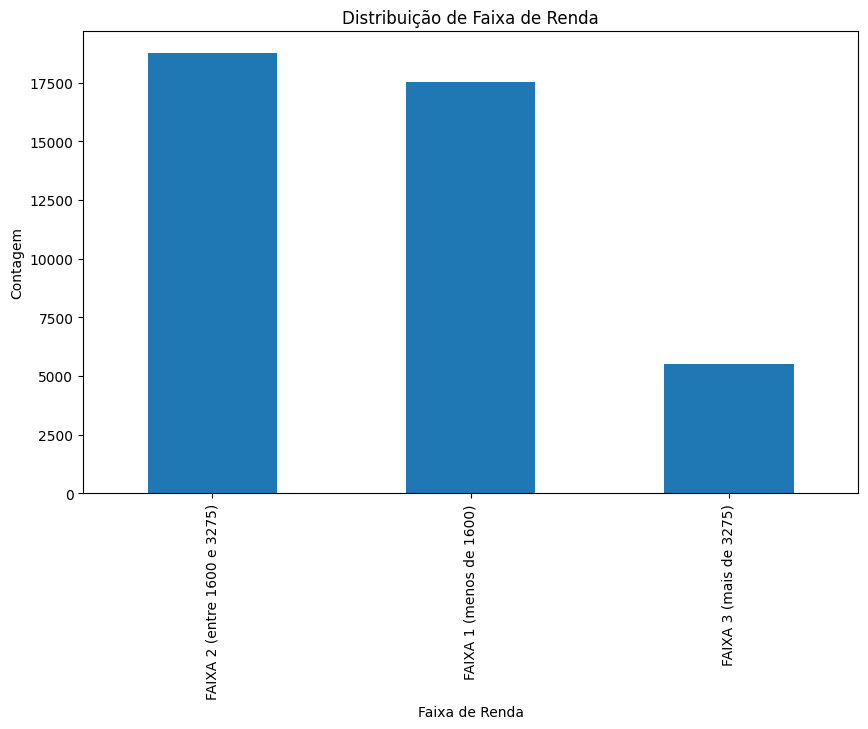

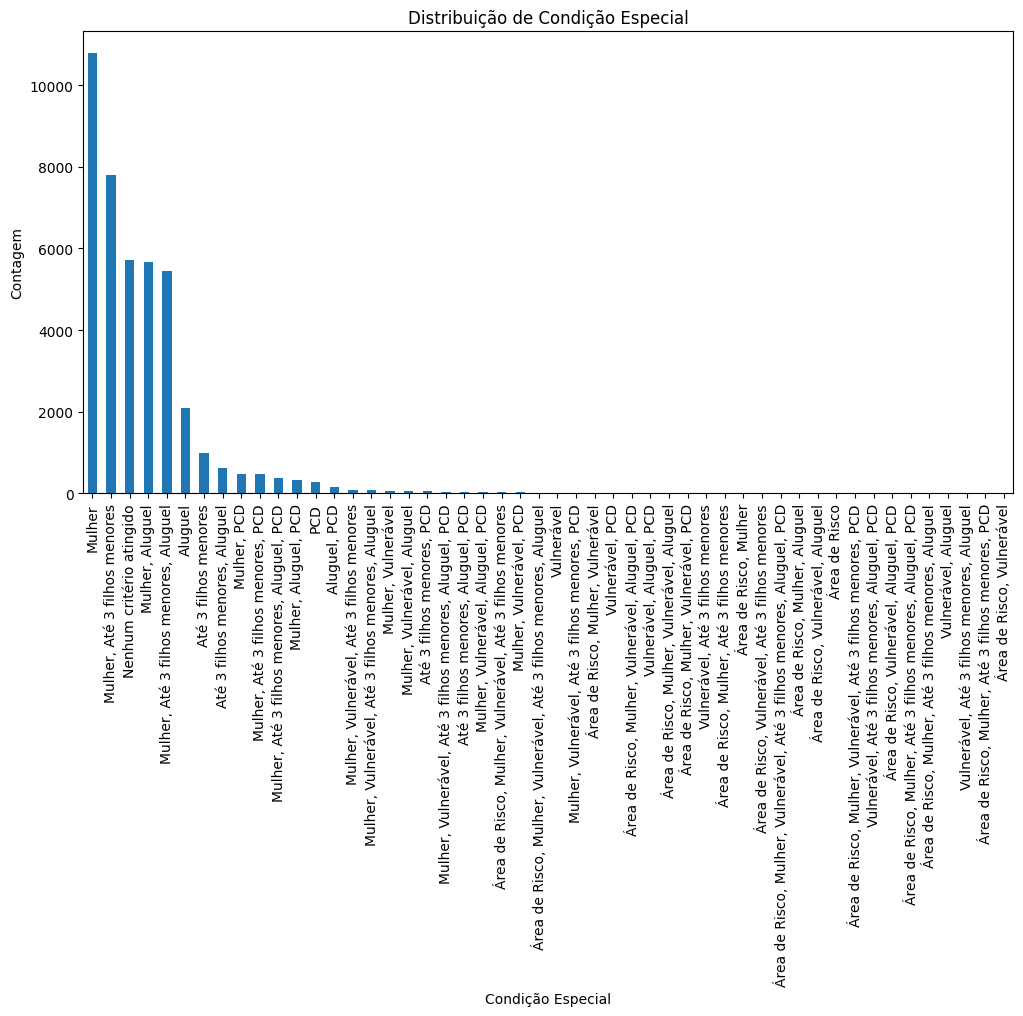

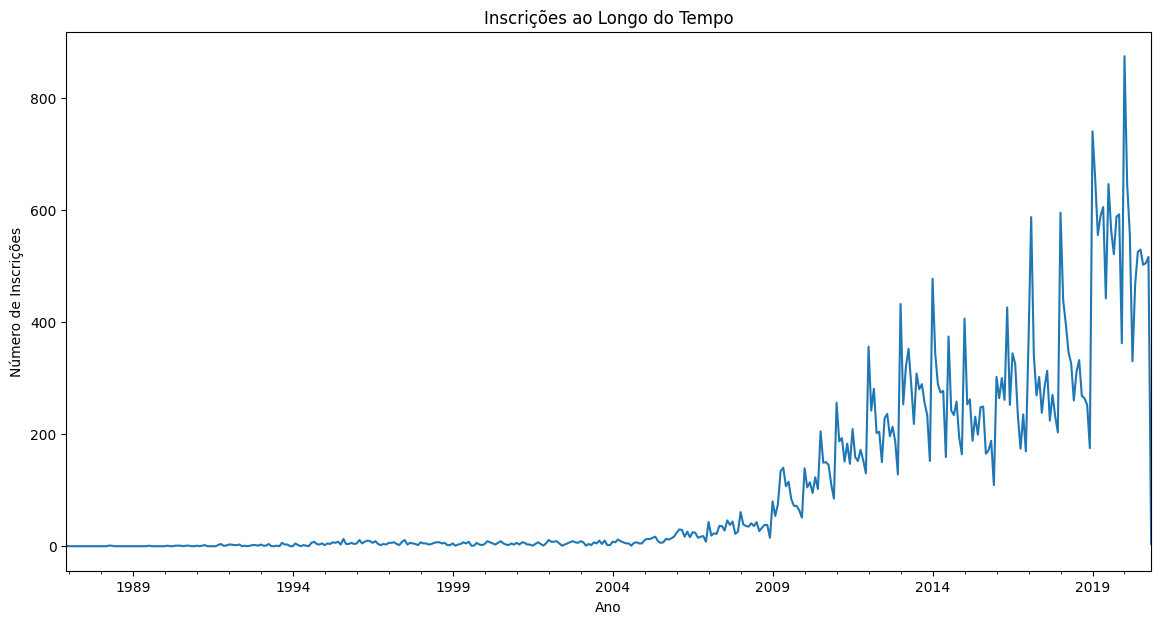

In [134]:
# Visualização dos dados utilizando Matplotlib
pandas_df = spark_df.toPandas()

# Histograma da faixa de renda
plt.figure(figsize=(10, 6))
pandas_df['faixa_renda'].value_counts().plot(kind='bar')
plt.title('Distribuição de Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Contagem')
plt.show()

# Gráfico de barras para condição especial
plt.figure(figsize=(12, 6))
pandas_df['condicao_especial'].value_counts().plot(kind='bar')
plt.title('Distribuição de Condição Especial')
plt.xlabel('Condição Especial')
plt.ylabel('Contagem')
plt.show()

# Gráfico de linha para análise temporal
pandas_df['data_inscricao'] = pd.to_datetime(pandas_df['data_inscricao'])
pandas_df.set_index('data_inscricao', inplace=True)
monthly_counts = pandas_df.resample('M').size()

plt.figure(figsize=(14, 7))
monthly_counts.plot(kind='line')
plt.title('Inscrições ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Inscrições')
plt.show()

# **5 - Conclusão**

Nesta primeira fase, coletamos, limpamos e analisamos os dados do cadastro de pretendentes a moradias populares em Curitiba. Identificamos as variáveis mais importantes e fizemos uma análise exploratória detalhada. A próxima etapa será a aplicação de técnicas de machine learning para extrair insights mais profundos e prever padrões que possam auxiliar na gestão das políticas habitacionais.

# **Código em uma única cédula para testes**

+---+--------------+-------------+--------------------+--------------------+--------------------+--------------------+-------------------+
| id|data_inscricao|data_validade|   condicao_especial|         faixa_renda|              bairro|              cidade|          data_lote|
+---+--------------+-------------+--------------------+--------------------+--------------------+--------------------+-------------------+
|  1|    1986-12-30|      07/2021|              Mulher|FAIXA 3 (mais de ...|NÚCLEO HABITACION...|         Campo Largo|2020-11-03 10:28:10|
|  2|    1988-04-26|      07/2021|              Mulher|FAIXA 1 (menos de...|      Campo Comprido|            Curitiba|2020-11-03 10:28:10|
|  3|    1988-05-17|      04/2021|              Mulher|FAIXA 2 (entre 16...|   Cidade Industrial|            Curitiba|2020-11-03 10:28:10|
|  4|    1990-07-12|      01/2021|Nenhum critério a...|FAIXA 3 (mais de ...|   Cidade Industrial|            Curitiba|2020-11-03 10:28:10|
|  5|    1989-07-03|      0

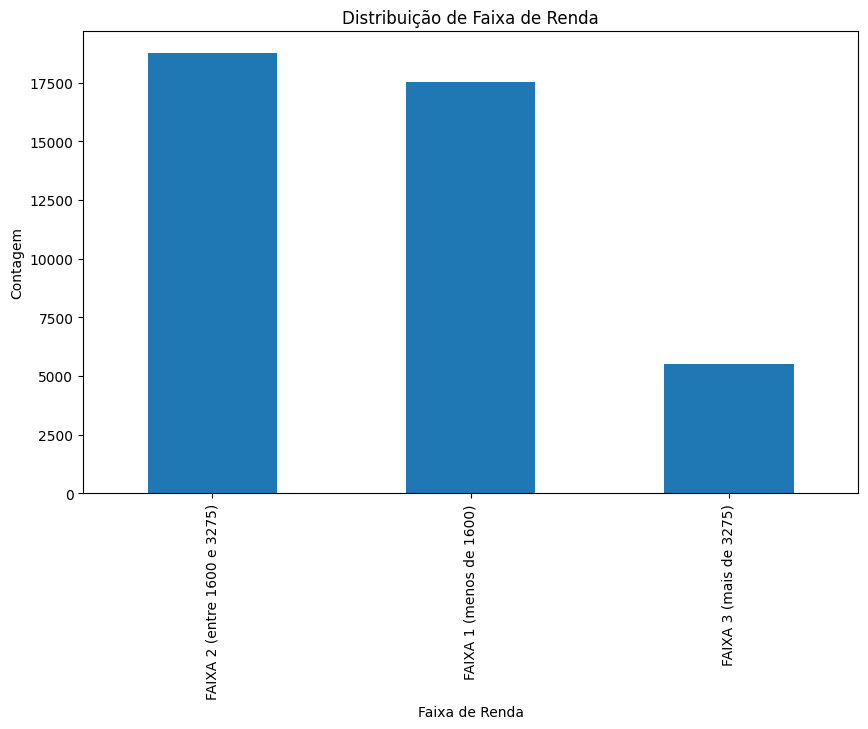

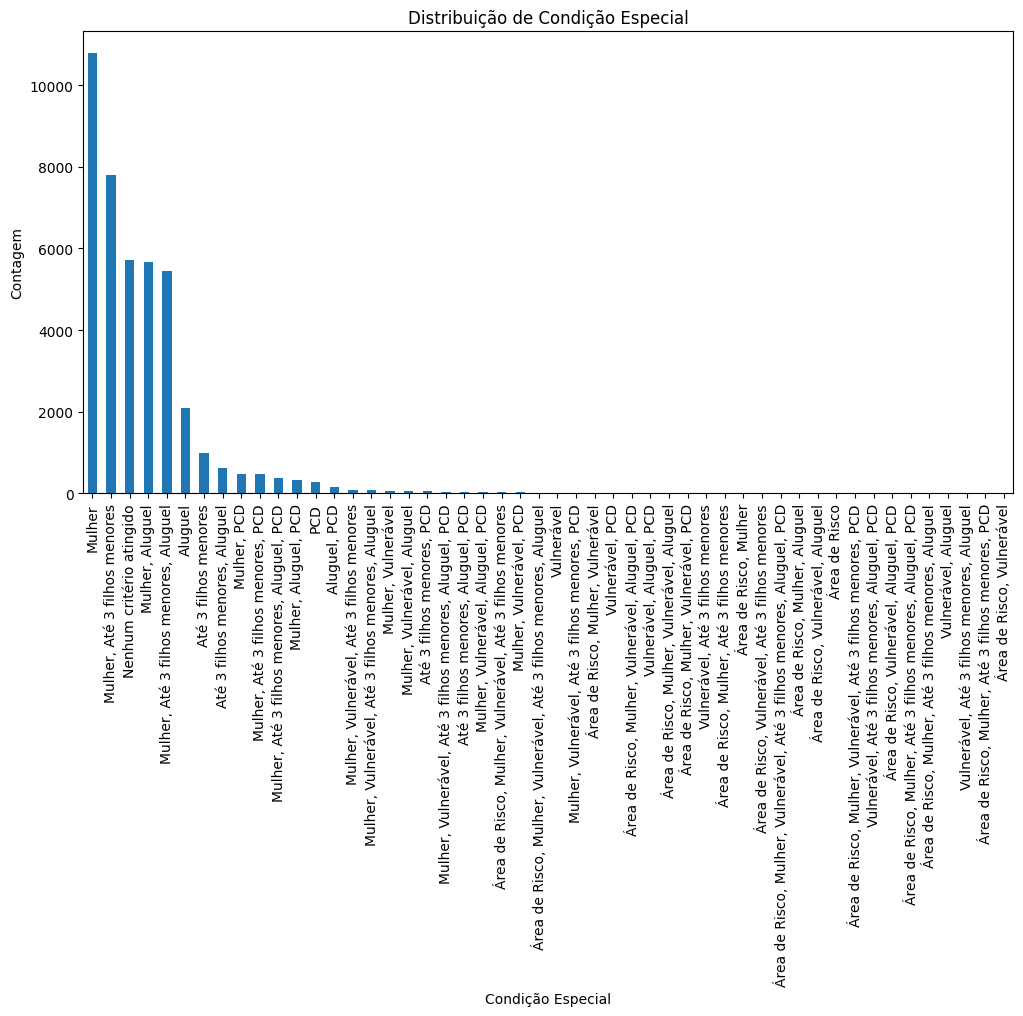

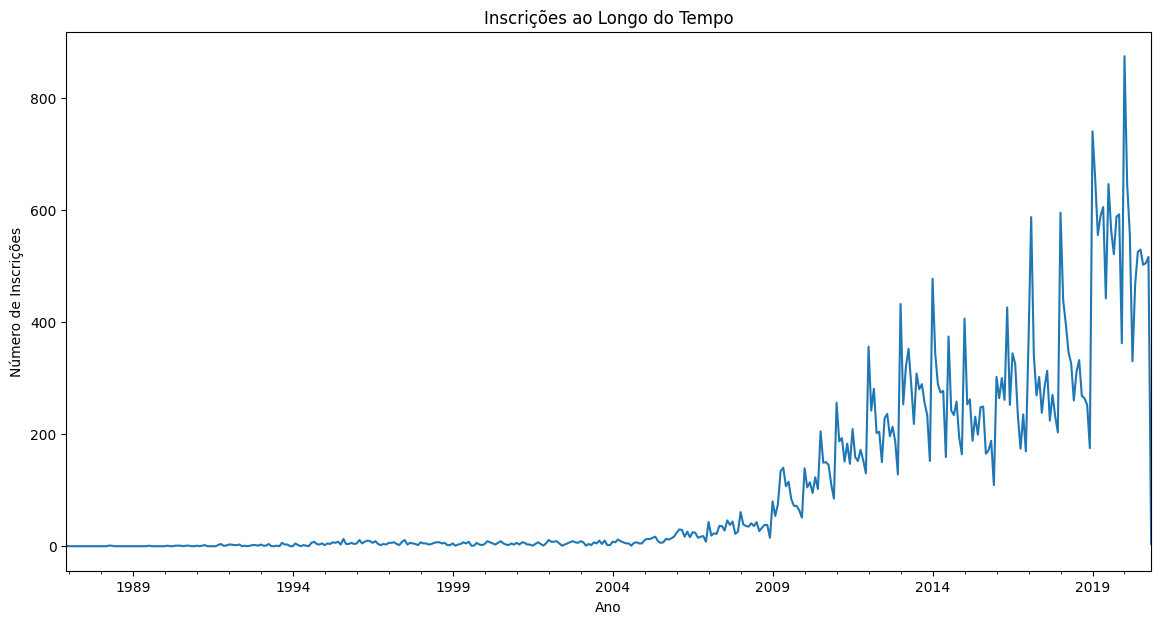

In [89]:
import pandas as pd
from pyspark.sql import SparkSession
from pyspark.sql.functions import col, sum, year, month, when, count
import matplotlib.pyplot as plt

# Carregar o arquivo Excel e salvar como CSV
file_path = 'fila.xlsx'
df = pd.read_excel(file_path, sheet_name='Planilha1')
csv_file_path = 'fila.csv'
df.to_csv(csv_file_path, index=False)

# Iniciar uma sessão do Spark
spark = SparkSession.builder.appName("DataAnalysis").getOrCreate()

# Carregar o arquivo CSV no Spark
spark_df = spark.read.csv(csv_file_path, header=True, inferSchema=True)

# Exibir as primeiras linhas do DataFrame no Spark
spark_df.show()

# Descrição do dataset
dataset_description = {
    "Fonte/Origem": "Arquivo Excel 'fila.xlsx'",
    "Apresentação do Cenário": "O dataset contém informações de inscrições em algum programa, com dados como data de inscrição, validade da inscrição, condição especial do inscrito, faixa de renda, bairro, cidade e data do lote.",
    "Tipo do Dataset": "Estruturado",
    "Descrição do Dataset": {
        "Número de Instâncias": spark_df.count(),
        "Número de Variáveis": len(spark_df.columns),
        "Variáveis": spark_df.columns,
        "Tipos de Dados": {col: dtype for col, dtype in spark_df.dtypes}
    },
    "Manipulação Prévia do Dataset": "Carregamento, conversão para CSV e carga no ambiente Spark.",
    "Atividades Realizadas no Dataset": [
        "Carregamento e conversão do dataset",
        "Seleção de variáveis relevantes",
        "Análise exploratória inicial",
        "Documentação inicial do projeto"
    ]
}
print(dataset_description)

# Selecionar variáveis relevantes para o projeto
selected_columns = ['data_inscricao', 'data_validade', 'condicao_especial', 'faixa_renda', 'bairro', 'cidade', 'data_lote']
spark_df_selected = spark_df.select(selected_columns)
spark_df_selected.show()

# Verificar tipos de dados das colunas selecionadas
spark_df_selected.dtypes

# Salvar descrição do dataset
initial_documentation = """
Descrição do Dataset:
- Fonte/Origem: Arquivo Excel 'fila.xlsx'
- Apresentação do Cenário: O dataset contém informações de inscrições em algum programa, com dados como data de inscrição, validade da inscrição, condição especial do inscrito, faixa de renda, bairro, cidade e data do lote.
- Tipo do Dataset: Estruturado
- Descrição do Dataset:
    - Número de Instâncias: {num_instances}
    - Número de Variáveis: {num_variables}
    - Variáveis: {variables}
    - Tipos de Dados: {data_types}

Atividades Realizadas:
- Carregamento do dataset
- Conversão de Excel para CSV
- Seleção de variáveis relevantes
- Análise exploratória inicial
- Documentação inicial do projeto
""".format(
    num_instances=spark_df_selected.count(),
    num_variables=len(spark_df_selected.columns),
    variables=spark_df_selected.columns,
    data_types={col: dtype for col, dtype in spark_df_selected.dtypes}
)
print(initial_documentation)


# Experimentos iniciais
experiments = """
Experimentos Iniciais:
- Seleção de variáveis relevantes para o projeto
- Seleção das ferramentas/técnicas de big data (Spark)
- Análise exploratória e estatísticas descritivas
- Remoção de outliers
- Planejamento do projeto e cronograma
"""
print(experiments)

# Documentação inicial
initial_documentation += """
Experimentos Iniciais:
- Seleção de variáveis relevantes para o projeto
- Seleção das ferramentas/técnicas de big data (Spark)
- Análise exploratória e estatísticas descritivas
- Remoção de outliers
- Planejamento do projeto e cronograma
"""
print(initial_documentation)


# Análise exploratória do dataset
# Estatísticas descritivas das variáveis selecionadas
spark_df_selected.describe().show()

# Exibir a contagem de valores ausentes por coluna
missing_values = spark_df_selected.select([sum(col(c).isNull().cast("int")).alias(c) for c in spark_df_selected.columns])
missing_values.show()

# Planejamento do projeto e cronograma detalhado
project_plan = {
    "Semana 1": "Descrição do dataset, seleção de variáveis relevantes, limpeza de dados",
    "Semana 2": "Análise exploratória, remoção de outliers, estatísticas descritivas",
    "Semana 3": "Aplicação de técnicas de big data, experimentos iniciais",
    "Semana 4": "Avaliação de resultados, ajustes finais, documentação"
}
print(project_plan)


# Descrição dos experimentos com os frameworks de big data
experiments += """
Descrição dos experimentos com os frameworks de big data (Semana 4):
- Utilização do framework Spark para análise e processamento distribuído
- Aplicação de técnicas de big data como processamento paralelo e distribuído
- Comparação entre diferentes técnicas de big data (mínimo três técnicas diferentes)
- Análise dos resultados obtidos
"""
print(experiments)


# Visualizações e conclusão
# Análise de frequência de categorias
condicao_especial_count = spark_df_selected.groupBy("condicao_especial").agg(count("condicao_especial").alias("count")).orderBy(col("count").desc())
faixa_renda_count = spark_df_selected.groupBy("faixa_renda").agg(count("faixa_renda").alias("count")).orderBy(col("count").desc())
bairro_count = spark_df_selected.groupBy("bairro").agg(count("bairro").alias("count")).orderBy(col("count").desc())
cidade_count = spark_df_selected.groupBy("cidade").agg(count("cidade").alias("count")).orderBy(col("count").desc())

# Exibir resultados
condicao_especial_count.show()
faixa_renda_count.show()
bairro_count.show()
cidade_count.show()

# Análise temporal por ano e mês
inscricoes_por_ano_mes = spark_df_selected.groupBy(year("data_inscricao").alias("year"), month("data_inscricao").alias("month")).count().orderBy("year", "month")
inscricoes_por_ano_mes.show()

# Mapeamento da faixa de renda para valores numéricos
spark_df = spark_df.withColumn("faixa_renda_num",
                               when(spark_df["faixa_renda"].contains("menos de 1.600"), 1)
                               .when(spark_df["faixa_renda"].contains("entre 1.601 e 3.000"), 2)
                               .when(spark_df["faixa_renda"].contains("mais de 3.000"), 3))

spark_df.select("faixa_renda", "faixa_renda_num").show()

# Visualização dos dados utilizando Matplotlib
pandas_df = spark_df.toPandas()

# Histograma da faixa de renda
plt.figure(figsize=(10, 6))
pandas_df['faixa_renda'].value_counts().plot(kind='bar')
plt.title('Distribuição de Faixa de Renda')
plt.xlabel('Faixa de Renda')
plt.ylabel('Contagem')
plt.show()

# Gráfico de barras para condição especial
plt.figure(figsize=(12, 6))
pandas_df['condicao_especial'].value_counts().plot(kind='bar')
plt.title('Distribuição de Condição Especial')
plt.xlabel('Condição Especial')
plt.ylabel('Contagem')
plt.show()

# Gráfico de linha para análise temporal
pandas_df['data_inscricao'] = pd.to_datetime(pandas_df['data_inscricao'])
pandas_df.set_index('data_inscricao', inplace=True)
monthly_counts = pandas_df.resample('M').size()

plt.figure(figsize=(14, 7))
monthly_counts.plot(kind='line')
plt.title('Inscrições ao Longo do Tempo')
plt.xlabel('Ano')
plt.ylabel('Número de Inscrições')
plt.show()

